### Deep Learning Models

In this chapter, we go over the details of:

 - Percentron Model (an artificial neuron/a single neuron)
 - Neural Networks (basis for deep learning)
 - Keras Basics for Regression Task (how to implement in Python)
 - Recurrent Neural Networks
 - LSTM and GRU Neurons
 - Time Series Forecasting with RNN
 - Multivariate Time Series

In general, neural networks tend to be "black boxes" (unlike ARIMA). Thus, it is difficult to interpret them beyond their performance metrics.


#### Perceptron Model

Percenptron (artificial neuron) attempts to mimic a biological neuron. It takes some inputs and, after some operation (activation function), provides an output.


#### Neural Networks

A neural network consists of three layers: input layer, hidden layer, and output layer.

- Input layer: Real values from the data

- Hidden layer: A layer between the input and output layers. It consists of a collection of neurons (nodes). When there are 3 or more layers, it is called a 'deep network'.

- Output layer: final estimate of the output.

In the hidden layer, we use an activation function. The activation function of a node is a function that calculates the output of the node based on its individual inputs and their weights. Depending on the requirement, we may use different activation functions (sigmoid, tanh, ReLU, ...). The deep learning libraries have these built in for us, so we do not need to worry about having to implement them manually.


#### Keras Basics

Here we discuss basics of Keras and building a neural network (NN). To biuld an NN with Keras, we first define the sequential model object, then add layers to it.

Once we have the model, we fit the model to the training data for a chosen number of epochs (one full pass through all the training data). Typically, the training data is aplit into batches, instead of being passed all at once to the network.


In [1]:
### Load libraries

#!pip install keras
#!pip install tensorflow

import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
### Let's try to implement the following (basic equation for a line)

### y = mx + b + noise (we add a noise so that it is not a perfect line)

m = 2
b = 3
x = np.linspace(0,50,100)

### noise
np.random.seed(101)
noise = np.random.normal(loc=0, scale=4, size=len(x))

In [3]:
### Create y numbers

y = 2*x + b + noise


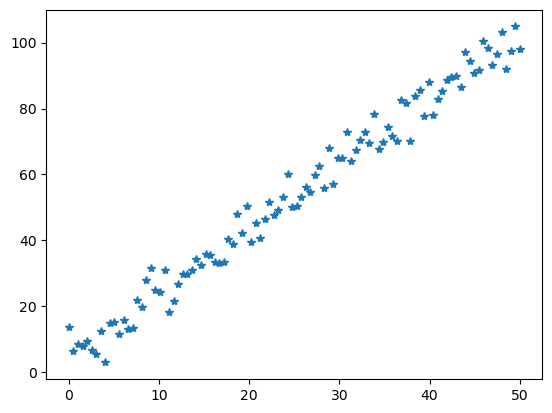

In [4]:
plt.plot(x,y,'*');

In [5]:
### Now we are trying to fit a neural network to find the line best fit

from keras.models import Sequential ### This allow us to add layers

In [6]:
from keras.layers import Dense, Input ### All the neurons from the previous layers are connect to next layer

In [7]:
### Create the model

model = Sequential()

# Add the Input layer first
model.add(Input(shape=(1,))) ### input dimension is 1 as we only have one x variable

### First hidden layer
model.add(Dense(units = 4, activation='relu')) ### 4 neurons

### Second hidden layer
model.add(Dense(units=4, activation='relu'))

### We have one output. Thus, the final layer
model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
### Now we fit the model

model.fit(x, y, epochs=150) ### Given and value of x, what would be the value of y

### Observe the loss function value. After a certain epoch, no significant decrease in the loss.
### If it does not converge, we may increase the number of epochs (change the hyperparameters)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4033.7891
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3974.6509
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3915.0684
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3854.6426
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3793.7341
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3731.6150
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3673.8367
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3611.7075
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3549.7017
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3488.0029
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3426.4485
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3365.6543
Epoch 13/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3305.6504
Epoch 14/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3242.3662
Epoch 15/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22

In [9]:
### View the loss function values

# model.history.history['loss']

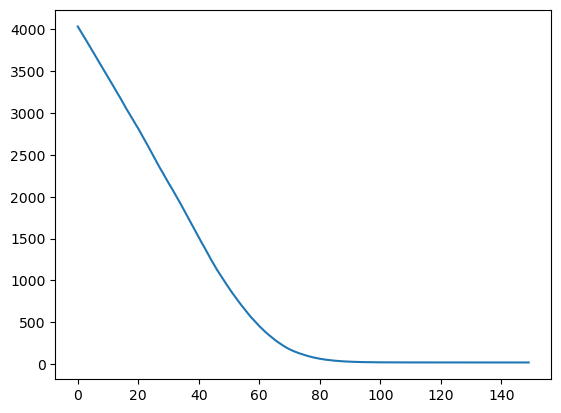

In [10]:
### In most cases, we would be likely to see these values in a plot

loss = model.history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss);

### Note: If we rerun the model, it will start where we left off. That is, it starts with the loss corresponding to the 200th epoch.

In [11]:
### Since the model is converging, we can use the model to predict y values

x_for_predictions = np.linspace(0,50,100)

y_predict = model.predict(x_for_predictions)



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


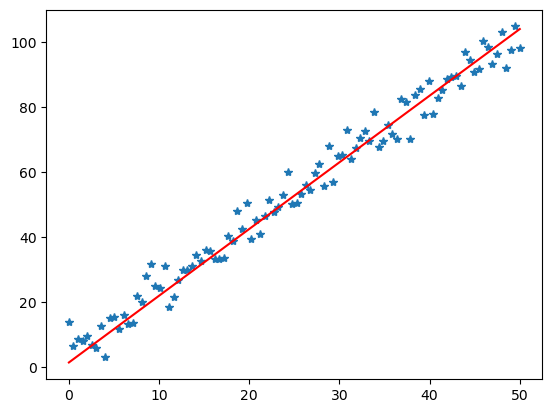

In [12]:
### Let's plot the predicted values

plt.plot(x,y,'*');
plt.plot(x_for_predictions,y_predict, 'r');

In [13]:
### Evaluate the error

from sklearn.metrics import mean_squared_error

In [14]:
mean_squared_error(y, y_predict)

### Note: Very close to the loss function value

19.44147616877551

### Recurrent Neural Networks (RNNs)

RNNs are specifically designed to handle sequential data (time series - sales, sentences, audio, music). 

A sequence is a vector of information, and its index location basically points out its point in time. We may want to predict the value if the series is shifted one/two time points into the future (sales for the next day).

A normal neuron in a feed-forward network takes inputs, aggregates inputs, passes through an activation function, and gives output.
However, a recurrent neuron is slightly different. It sends the output back to itself.
Thus, each neuron has two sets of inputs (input from the previous time point and input from the current time point).

Cells that are a function of inputs from previous time steps are known as memory cells.
RNNs are also flexible in their inputs and outputs, for both sequences and single vector values.

In the hidden layer (collection of neurons), it takes input, then provides an output together, and this output goes back to the neurons as an input.

Since the output is now based on inputs of the past time step, it holds some form of memory.
So the part of this neural network that preserves this dependency is called a memory cell. Later, we will see much complicated instances. 

Example 1: We can use sequential inputs to sequential outputs (sales for a year and sales shifted by one time step)

Example 2: We can feed a sequence of inputs and an output (sentiment scores).
Feed a sequence of words (a paragraph from a movie review), and return whether it is positive feedback or negative feedback.

Example 3: Single input (vector) and expect a sequence of output (provide a word and return phrases with that word).


#### LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit)

An issue with RNNs (for long sequences) is that after a while, they forget the first input (vanishing gradient).
Thus, we need some sort of long-term memory.

The LSTM cell is created to help with this issue. 

In an LSTM cell, we still have our inputs (data input and the input coming from the loop for the previous time step), as in a normal RNN.
In addition, we have another input, and we call it the cell state from the previous time step.
The first step is called "forgets gate" layer. Here, we decide what information we are going to forget from the cell state.
The next step is to decide what new information we are going to store in the cell state.
Then, we will update the cell state based on this information (forget some info and add new candidate info).
With the updated cell state and current info at the time step, we decide what to output.

Note that there are different variations (peepholes - able to see previous cell state, GRU - combine forget and input gates into an update gate).

Example: Use LSTM for text generation.


In [15]:
### Load Data

df = pd.read_csv('Chapter_7_Alcohol_Sales.csv', index_col='DATE', parse_dates=True)
df.index.freq = 'MS'
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [16]:
### Rename the column

df.columns = ['Sales']
df.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


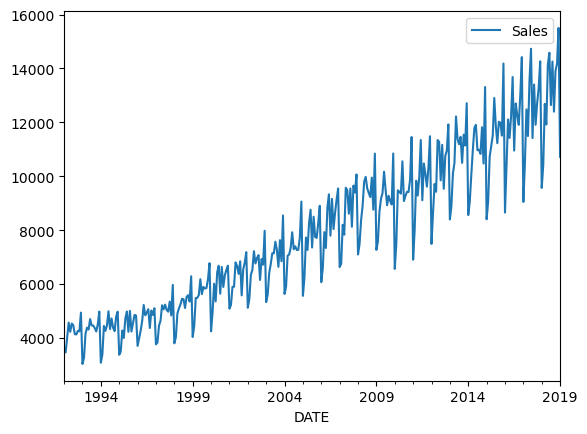

In [17]:
df.plot();

### Some general trend and seasonality

In [18]:
### Seasonal decompose data

from statsmodels.tsa.seasonal import seasonal_decompose

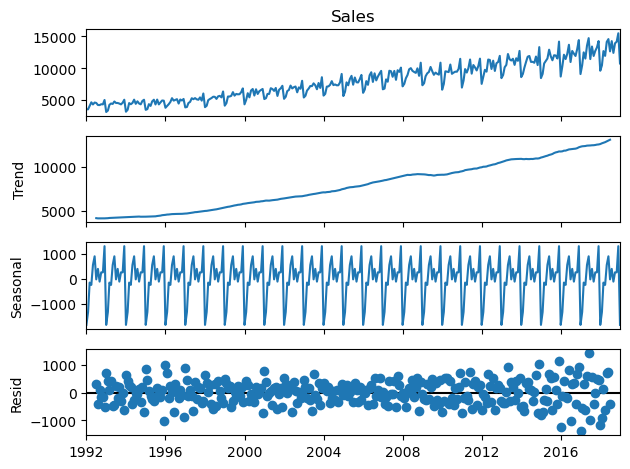

In [19]:
results = seasonal_decompose(df['Sales'])
results.plot();

In [20]:
### We want to see how an RNN would handle this data

### To test performance, we first create train and test (forecast into 1 year) datasets

len(df)

325

In [21]:
train = df.iloc[:313]
test = df.iloc[313:]

In [22]:
### Now we are preparing the data for RNN

### In most cases, we may be required to scale the data. One popular approach would be to divide each value by the maximum.
### With this, all the values are between zero and one.

from sklearn.preprocessing import MinMaxScaler ### This will automatically carry out the scaling

### Here, finding the max is 'fit' and dividing the values is 'transformation'


In [23]:
scaler = MinMaxScaler()

In [24]:
scaler.fit(train) ### Finds the max value for the training data

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [25]:
scaled_train = scaler.transform(train)

scaled_test = scaler.transform(test)

In [26]:
### Previously, we had to manually set up the data (batches) to feed into the model sequentially.
### However, now we can do that easily with the preprocessing available in Keras.

### Note that TimeseriesGenerator has been removed from newer versions of Keras
### Solution: Install the standalone package

# !pip install tensorflow-keras

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [27]:
### Let's create batches using TimeseriesGenerator

n_input = 2
n_features = 1

generator = TimeseriesGenerator(data=scaled_train, targets=scaled_train, ### Both training and target are in the same dataset
                                length=n_input,
                               batch_size=1)


In [28]:
len(scaled_train)

313

In [29]:
len(generator) ### That is 313 - 2 (n_input)

311

In [30]:
X,y = generator[0] ### The first item in the generator object

X

array([[[0.03658432],
        [0.03649885]]])

In [31]:
scaled_train[:5] ### First 5 items from scaled_train data. Check first two values and compare againts the X

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ]])

In [32]:
y ### Y is the third value in the scaled_train dataset.

### Thus, we use the first two values and predict the third value.
### Change n_input and see how the generator is changing

array([[0.08299855]])

In [33]:
### How do we decide the length of the training data?
### IF data show seasonality over a year, we need at least 12 data points so that NN picks up the seasonality.

In [34]:
### Now we are going to create the model and fit it to the generator object

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LSTM

In [35]:
n_input = 12
n_features = 1

train_generator = TimeseriesGenerator(data=scaled_train, targets=scaled_train, ### Both training and target are in the same dataset
                                length=n_input,
                               batch_size=1)

In [36]:
model = Sequential()

# Add the Input layer
model.add(Input(shape=(n_input,n_features)))

### First hidden layer
model.add(LSTM(units=150, activation='relu'))

### Output layer
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 150)                 │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,351 (356.84 KB)

 Trainable params: 91,351 (356.84 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.fit(train_generator, epochs=25) ### 25 full runs through the traning data

Epoch 1/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0131
Epoch 2/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0096
Epoch 3/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0081
Epoch 4/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0082
Epoch 5/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0055
Epoch 6/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0051
Epoch 7/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0032
Epoch 8/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0029
Epoch 9/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0027
Epoch 10/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0025
Epoch 11/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0025
Epoch 12/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0020
Epoch 13/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0019
Epoch 14/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0020
Epoch 15/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 

In [38]:
model.history.history.keys()

dict_keys(['loss'])

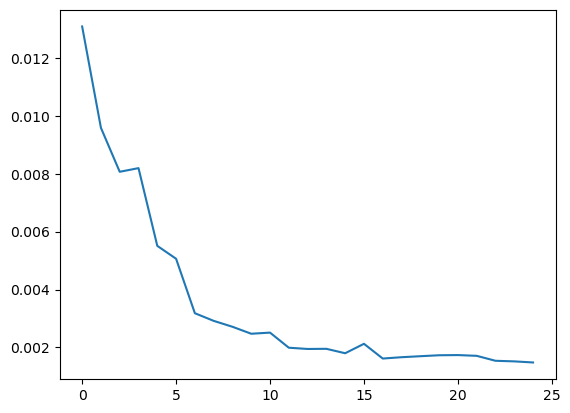

In [39]:
### Plot loss against the epochs

myloss = model.history.history['loss']

plt.plot(range(len(myloss)),myloss);

In [40]:
### Now let's evaluate this on test data

### For this, we need to generate the test batch

### Since we use n_input = 12, we use 12 historical data points to predict the 13th value

### Thus, we need the last 12 data points to predict 1st point in the  test data

first_eval_batch = scaled_train[-12:] ### Last 12 data points from train data
first_eval_batch

### This is not in the same 'shape' as the evaluation batch we had (generator)

first_eval_batch = first_eval_batch.reshape((1,n_input,n_features))

In [41]:
model.predict(first_eval_batch) ### This output is two dimentional

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


array([[0.7743298]], dtype=float32)

In [42]:
model.predict(first_eval_batch)[0] ### This output is one dimentional

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


array([0.7743298], dtype=float32)

In [43]:
### The value above is the prediction for the first value in the test data

### Now we have to do this for all the test data

In [44]:
### Note the shape of the batch. It has three elements. We need this in the next step.

first_eval_batch.shape

(1, 12, 1)

In [45]:
### Holding my predictions
test_prediction = [] 

### Last n_inputs points from the training set
first_eval_batch = scaled_train[-n_input:]
### Reshape above to the format RNN wants (same format as TimeseriesGenerator)
current_batch = first_eval_batch.reshape((1,n_input,n_features))

### How far into the future will I forecast?
### However, this can be modified to forecast any number of points into the future. len(test) replace with a 'number'
for i in range(len(test)):

    ### One timestep ahead of historical 12 points
    current_pred = model.predict(current_batch)[0]

    ### Store the prediction
    test_prediction.append(current_pred)

    ### Update the current batch to include the prediction
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)
    ### Once I have the prediction, I am dropping the first value and adding the prediction as the last value
    ### with "current_batch[:,1:,:]", we capture elements of the current batch from 1 to the end (dropping index zero/first value)
    ### with "np.append", we are adding the current prediction to "current_batch[:,1:,:]"
    ### Thus, after some time, we will be doing forecasts based on forecasts


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


In [46]:
test_prediction

### Note that predictions are scaled
### We need to reverse the scale before comparing against the observed values

[array([0.7743298], dtype=float32),
 array([0.9170248], dtype=float32),
 array([0.8566216], dtype=float32),
 array([1.0363703], dtype=float32),
 array([1.1217101], dtype=float32),
 array([0.84238446], dtype=float32),
 array([1.0174313], dtype=float32),
 array([0.86678374], dtype=float32),
 array([0.9559208], dtype=float32),
 array([0.99749035], dtype=float32),
 array([1.0857831], dtype=float32),
 array([0.6915043], dtype=float32)]

In [47]:
true_predictions = scaler.inverse_transform(test_prediction)
true_predictions

array([[12089.88411415],
       [13759.27303272],
       [13052.61636794],
       [15155.49587536],
       [16153.88601565],
       [12886.05576932],
       [14933.92830086],
       [13171.50295246],
       [14214.31762016],
       [14700.6395629 ],
       [15733.57676733],
       [11120.9088015 ]])

In [48]:
### Let's add these to the testing dataset

test['Predictions'] = true_predictions
test.head()

C:\Users\sulal\AppData\Local\Temp\ipykernel_8040\2188324146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


,Sales,Predictions
DATE,,
2018-02-01,10415,12089.884114
2018-03-01,12683,13759.273033
2018-04-01,11919,13052.616368
2018-05-01,14138,15155.495875
2018-06-01,14583,16153.886016


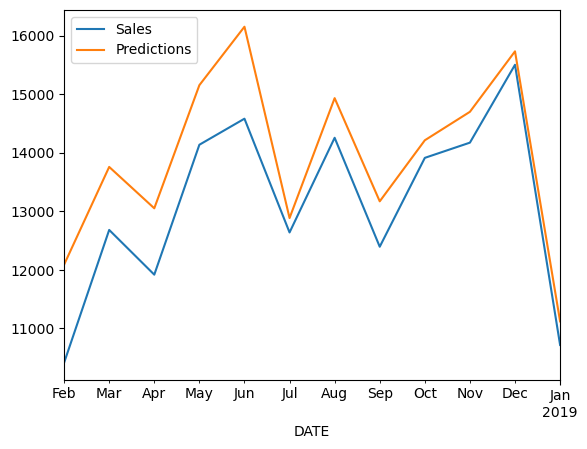

In [49]:
test.plot();

### Predictions are very close.
### Due to some randomness, we may get different values.

In [50]:
### Since we trained the model, we may need to save the model

model.save('MyLSTMmodel.keras') ### THis will be saved in the working directory.

In [51]:
### If the model needs to be loaded into the working notebook, try following

from keras.models import load_model

new_model = load_model('myLSTMmodel.keras')


In [52]:
new_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 150)                 │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 274,055 (1.05 MB)

 Trainable params: 91,351 (356.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 182,704 (713.69 KB)

In [53]:
### Note: If we need to forecast into the unseen future, we can follow the same procedure and extend the forecast length as needed.

#### Multivariate Time Series with LSTM and RNNs

Using the deep learning models in multivariate time series has pros and cons. As with all neural networks, the model is essentially a black box, difficult to interpret. Also, some simpler models, which are easily interpretable, may work well in most cases (SARIMAX, VARMAX).
Thus, it is highly recommended to try the conventional approaches before investigating RNNs or LSTMs. However, when setting up for multivariate data, only two main changes are required. 

For multivariate time series:

- Change input shape in LSTM layer to reflect 2-D structure
- Final dense layer should have a neuron per feature/variable


Example Data: Appliance Energy Usage

Our ultimate goal is to create regression models of appliance energy use in a low-energy building.

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

Source of the dataset: http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

Note: We use part of the available data when forecasting.


In [54]:
### Load the data

df = pd.read_csv('Chapter_7_Energydata_Complete.csv', index_col='date', 
                 infer_datetime_format=True) ### Not only does the date column have date stamp, it has the time stamp too
df.head()

C:\Users\sulal\AppData\Local\Temp\ipykernel_8040\234685562.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('Chapter_7_Energydata_Complete.csv', index_col='date',


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


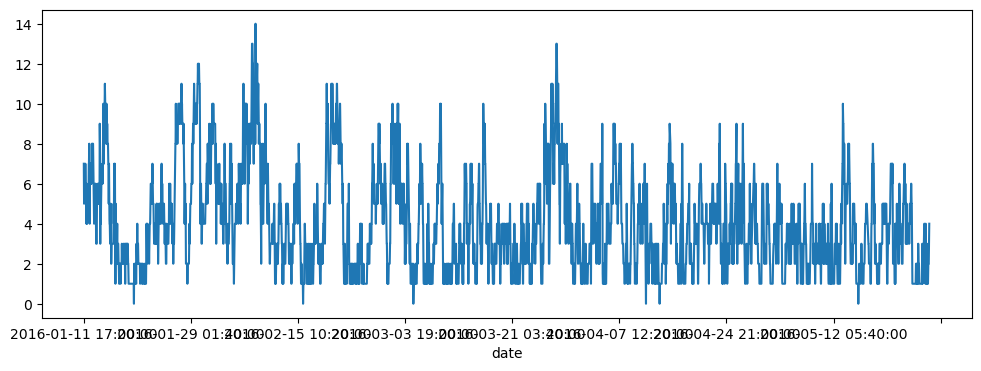

In [55]:
### Not missing values on this data

df['Windspeed'].plot(figsize=(12,4));

In [56]:
### Train and Test datasets

len(df)

19735

In [57]:
### We will be predicting 24 hours into the future

### Thus, instead of using all 3 months of data, we will be using data from last month

df = df.loc['2016-05-01':]

df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.200000,38.2000,18.390000,41.40,23.200000,36.400000,19.73,37.730000,...,19.166667,38.200000,4.300000,763.700000,86.000000,2.000000,40.000000,2.200000,15.310003,15.310003
2016-05-01 00:10:00,60,0,21.150000,38.1725,18.390000,41.50,23.133333,36.466667,19.70,37.663333,...,19.133333,38.290000,4.283333,763.716667,86.333333,2.166667,38.166667,2.216667,11.240067,11.240067
2016-05-01 00:20:00,50,0,21.133333,38.0900,18.323333,41.50,23.200000,36.500000,19.70,37.590000,...,19.133333,38.363333,4.266667,763.733333,86.666667,2.333333,36.333333,2.233333,21.808814,21.808814
2016-05-01 00:30:00,50,0,21.100000,38.0900,18.290000,41.50,23.200000,36.500000,19.70,37.500000,...,19.166667,38.500000,4.250000,763.750000,87.000000,2.500000,34.500000,2.250000,47.000534,47.000534
2016-05-01 00:40:00,60,0,21.100000,38.0300,18.290000,41.56,23.200000,36.500000,19.70,37.500000,...,19.166667,38.633333,4.233333,763.766667,87.333333,2.666667,32.666667,2.266667,8.059441,8.059441


In [58]:
### Also, data shows high precision (example: 18.290000)

### For convenience, we will round off the data to one decimal point precision

df = df.round(2)

df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.20,38.20,18.39,41.40,23.20,36.40,19.73,37.73,...,19.17,38.20,4.30,763.70,86.00,2.00,40.00,2.20,15.31,15.31
2016-05-01 00:10:00,60,0,21.15,38.17,18.39,41.50,23.13,36.47,19.70,37.66,...,19.13,38.29,4.28,763.72,86.33,2.17,38.17,2.22,11.24,11.24
2016-05-01 00:20:00,50,0,21.13,38.09,18.32,41.50,23.20,36.50,19.70,37.59,...,19.13,38.36,4.27,763.73,86.67,2.33,36.33,2.23,21.81,21.81
2016-05-01 00:30:00,50,0,21.10,38.09,18.29,41.50,23.20,36.50,19.70,37.50,...,19.17,38.50,4.25,763.75,87.00,2.50,34.50,2.25,47.00,47.00
2016-05-01 00:40:00,60,0,21.10,38.03,18.29,41.56,23.20,36.50,19.70,37.50,...,19.17,38.63,4.23,763.77,87.33,2.67,32.67,2.27,8.06,8.06


In [59]:
### Next we need to figure out the batch size

len(df)

3853

In [60]:
### How many rows per day?
### We know data are collected every 10 min

24*60/10 ### Every 144 days contains information for one day

144.0

In [61]:
test_days = 2
test_ind = test_days*144
test_ind

288

In [62]:
### Train and Test sets

train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [63]:
### Scale the data

scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [64]:
### Time Series Generator

length = 144
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [65]:
len(scaled_train)

3565

In [66]:
len(generator)

3421

In [67]:
### How does the first batch looks like

X,y = generator[0]

In [68]:
X

array([[[0.03896104, 0.        , 0.13798978, ..., 0.21301775,
         0.30618371, 0.30618371],
        [0.05194805, 0.        , 0.12947189, ..., 0.21420118,
         0.22473484, 0.22473484],
        [0.03896104, 0.        , 0.12606474, ..., 0.2147929 ,
         0.43626176, 0.43626176],
        ...,
        [0.05194805, 0.        , 0.32367973, ..., 0.15680473,
         0.43406044, 0.43406044],
        [0.05194805, 0.        , 0.30834753, ..., 0.14970414,
         0.64078447, 0.64078447],
        [0.03896104, 0.        , 0.30834753, ..., 0.14319527,
         0.75185111, 0.75185111]]])

In [69]:
y

array([[0.03896104, 0.        , 0.30834753, 0.29439421, 0.16038492,
        0.49182278, 0.0140056 , 0.36627907, 0.24142857, 0.24364791,
        0.12650602, 0.36276002, 0.12      , 0.28205572, 0.06169297,
        0.15759185, 0.34582624, 0.39585974, 0.09259259, 0.39649608,
        0.18852459, 0.96052632, 0.59210526, 0.1       , 0.58333333,
        0.13609467, 0.4576746 , 0.4576746 ]])

In [70]:
### Note it is much larger (number of y values). It is becase based on 144 values, we are predicting an entire row.

In [71]:
### Create the Model

model = Sequential()

### New input shape
model.add(Input(shape=(length,scaled_train.shape[1]))) ### We have "scaled_train.shape[1]" many feature columns

model.add(LSTM(25, activation='relu'))

### Final prediction (one neuron per feature)
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 25)                  │           5,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 28)                  │             728 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,128 (23.94 KB)

 Trainable params: 6,128 (23.94 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.fit(generator, epochs=5) ### We can increase the number of epochs. However, it may take a log time to run.

Epoch 1/5
3421/3421 ━━━━━━━━━━━━━━━━━━━━ 170s 49ms/step - loss: 0.0208
Epoch 2/5
3421/3421 ━━━━━━━━━━━━━━━━━━━━ 163s 48ms/step - loss: 0.0102
Epoch 3/5
3421/3421 ━━━━━━━━━━━━━━━━━━━━ 161s 47ms/step - loss: 0.0090
Epoch 4/5
3421/3421 ━━━━━━━━━━━━━━━━━━━━ 165s 48ms/step - loss: 0.0083
Epoch 5/5
3421/3421 ━━━━━━━━━━━━━━━━━━━━ 163s 48ms/step - loss: 0.0080


In [73]:
model.history.history.keys()

dict_keys(['loss'])

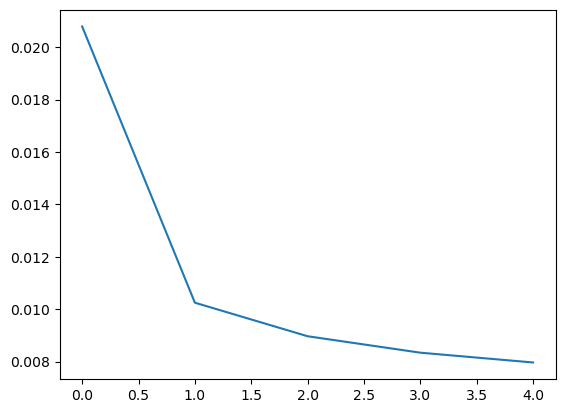

In [74]:
Losses = model.history.history['loss']
plt.plot(range(len(Losses)), Losses);

In [75]:
### Evaluate on Test Data

n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

### Note that the number test_predictions is very lengthy
# test_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━

In [76]:
scaled_test

array([[0.19480519, 0.        , 0.70017036, ..., 0.53372781, 0.76305783,
        0.76305783],
       [0.37662338, 0.        , 0.70017036, ..., 0.52840237, 0.62337402,
        0.62337402],
       [0.12987013, 0.        , 0.70017036, ..., 0.52366864, 0.08785271,
        0.08785271],
       ...,
       [0.32467532, 0.33333333, 0.87052811, ..., 0.86804734, 0.58415049,
        0.58415049],
       [0.51948052, 0.33333333, 0.87052811, ..., 0.86568047, 0.12627577,
        0.12627577],
       [0.53246753, 0.33333333, 0.87052811, ..., 0.86390533, 0.68260957,
        0.68260957]])

In [77]:
### Clip predictions to a reasonable range before inverse transform

test_predictions_clipped = np.clip(test_predictions, -1e10, 1e10)
true_predictions = scaler.inverse_transform(test_predictions_clipped)

In [78]:
### Conver the true predictions into a dataframe

true_predictions = pd.DataFrame(data=true_predictions, columns=test.columns)

true_predictions.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,112.226746,2.352036,24.320229,37.877842,24.382996,34.778244,25.130806,37.340221,24.065220,36.947052,...,22.037905,37.641811,17.104294,755.659058,55.670479,2.204146,38.307934,7.768064,26.287966,26.129738
1,125.199860,3.522297,24.299809,37.903111,24.401424,34.799652,25.072945,37.334381,24.056622,36.941650,...,22.033045,37.711021,17.102394,755.289246,55.081165,2.379632,36.896751,7.761250,26.069061,25.877691
2,132.157318,4.384025,24.285706,37.943874,24.398355,34.839874,25.023472,37.302303,24.056324,36.979538,...,22.032780,37.751621,17.101196,754.920044,54.811657,2.521980,35.507072,7.747948,25.940369,25.661333
3,136.244675,5.077271,24.277485,37.975021,24.386930,34.883068,24.986557,37.273006,24.058847,37.028454,...,22.038422,37.802254,17.114325,754.533997,54.594181,2.637850,34.132603,7.731527,25.832930,25.467672
4,138.694763,5.629912,24.274755,37.999504,24.371063,34.926369,24.959106,37.241730,24.063324,37.080898,...,22.048309,37.864239,17.140240,754.140381,54.393093,2.734533,32.822300,7.717107,25.733816,25.297989
